In [3]:
import numpy as np

In [36]:
qubosize = 3
Q = np.zeros((qubosize,qubosize))
Q[0,0]=1
Q[1,1]=1
Q[2,2]=1
Q[0,1]=2
Q[1,2]=2
Q[0,2]=3
print(Q)

[[1. 2. 3.]
 [0. 1. 2.]
 [0. 0. 1.]]


In [73]:
from qiskit.quantum_info import SparsePauliOp, Pauli

oplist = []
offset = 0
for i in range(qubosize):
    if Q[i,i]!=0:
        oplist.append(('Z',[i],-Q[i,i]/2))
    else:
        offset += 1/2
for i in range(qubosize):
    for j in range(i+1,qubosize):
        if Q[i,j]!=0:
            oplist.append(('ZZ',[i,j],Q[i,j]/4))
            oplist.append(('Z',[i],-Q[i,j]/4))
            oplist.append(('Z',[j],-Q[i,j]/4))
        else:
            offset += 1/4
            

H_p = SparsePauliOp.from_sparse_list(oplist, num_qubits=qubosize).simplify()
print(H_p)

SparsePauliOp(['IIZ', 'IZI', 'ZII', 'IZZ', 'ZIZ', 'ZZI'],
              coeffs=[-1.75+0.j, -1.5 +0.j, -1.75+0.j,  0.5 +0.j,  0.75+0.j,  0.5 +0.j])


In [56]:
from qiskit.circuit.library import QAOAAnsatz
ansatz = QAOAAnsatz(H_p, reps=1) 
ansatz.measure_all()

        ┌──────────────────┐ ░ ┌─┐      
   q_0: ┤0                 ├─░─┤M├──────
        │                  │ ░ └╥┘┌─┐   
   q_1: ┤1 QAOA(γ[0],β[0]) ├─░──╫─┤M├───
        │                  │ ░  ║ └╥┘┌─┐
   q_2: ┤2                 ├─░──╫──╫─┤M├
        └──────────────────┘ ░  ║  ║ └╥┘
meas: 3/════════════════════════╩══╩══╩═
                                0  1  2 


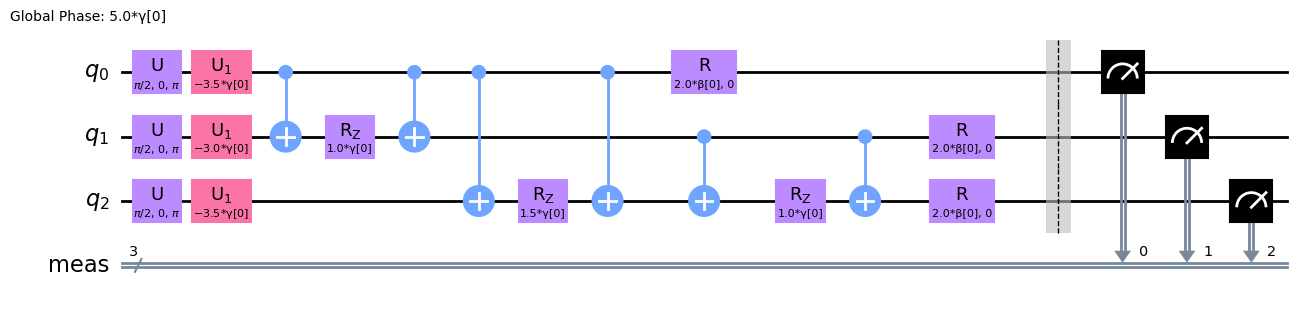

In [88]:

print(ansatz)
ansatz.decompose(reps=4).draw('mpl')

In [108]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.h(2)
qc.barrier()
qc.rz(-1.75,0)
qc.rz(-1.5,1)
qc.rz(-1.75,2)

qc.cx(0,1)
qc.rz(0.5,1)
qc.cx(0,1)

qc.cx(0,2)
qc.rz(0.75,2)
qc.cx(0,2)

qc.cx(1,2)
qc.rz(0.5,2)
qc.cx(1,2)
qc.barrier()

qc.rx(1,0)
qc.rx(1,1)
qc.rx(1,2)

qc.measure_all()

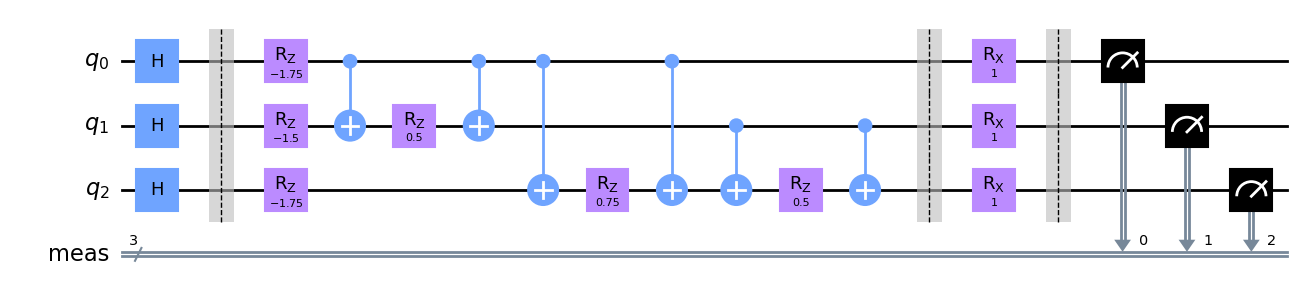

In [109]:
qc.draw('mpl')